In [213]:
# ---------------------------------------------------------------------
# Arquivo	: notebook.ipynb
# Conteúdo	: Exercício 2 da Disciplina de Redes Neurais Artificiais (DELT/UFMG)
# Autor	    : Gustavo Augusto Ortiz de Oliveira (gstvortiz@hotmail.com)
# Histórico	: 2023-09-21 - arquivo criado
#---------------------------------------------------------------------

***
# <font color=royalblue size=10>CONFIGURAÇÕES INICIAIS</font>
***

## 1. IMPORTANDO BIBLIOTECAS

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
sns.set(rc={"figure.dpi":300})
sns.set_style('ticks')
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

## 2. FUNÇÕES

In [215]:
def scatterplot(data, x, y, hue = None, figsize = (14, 8), xlim = (-3, 8), ylim = (-3, 8)):
    ax = sns.scatterplot(data = data, x = x, y = y, hue = hue, palette='turbo' if hue else None)
    ax.figure.set_size_inches(figsize)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

***
# <font color=seagreen size=10>CONHECENDO DADOS</font>
***

## 1. GERANDO DADOS ALEATÓRIOS

In [216]:
c1 = {'X0': 1, 'X1': np.random.normal(2, 0.4, 200), 'X2': np.random.normal(2, 0.4, 200), 'Y': -1}
c2 = {'X0': 1, 'X1': np.random.normal(4, 0.4, 200), 'X2': np.random.normal(4, 0.4, 200),  'Y': 1}

dados = pd.concat([pd.DataFrame(c1), pd.DataFrame(c2)]).reset_index(drop = True)
dados

,X0,X1,X2,Y
0,1,1.897202,1.690458,-1
1,1,1.969994,2.477792,-1
2,1,2.436267,1.619891,-1
3,1,1.746305,2.372121,-1
4,1,2.239769,2.258317,-1
...,...,...,...,...
395,1,3.888651,3.287061,1
396,1,4.060367,4.178227,1
397,1,3.541357,4.011422,1
398,1,3.256291,4.345374,1


## 2. VISUALIZANDO DISTRIBUIÇÕES

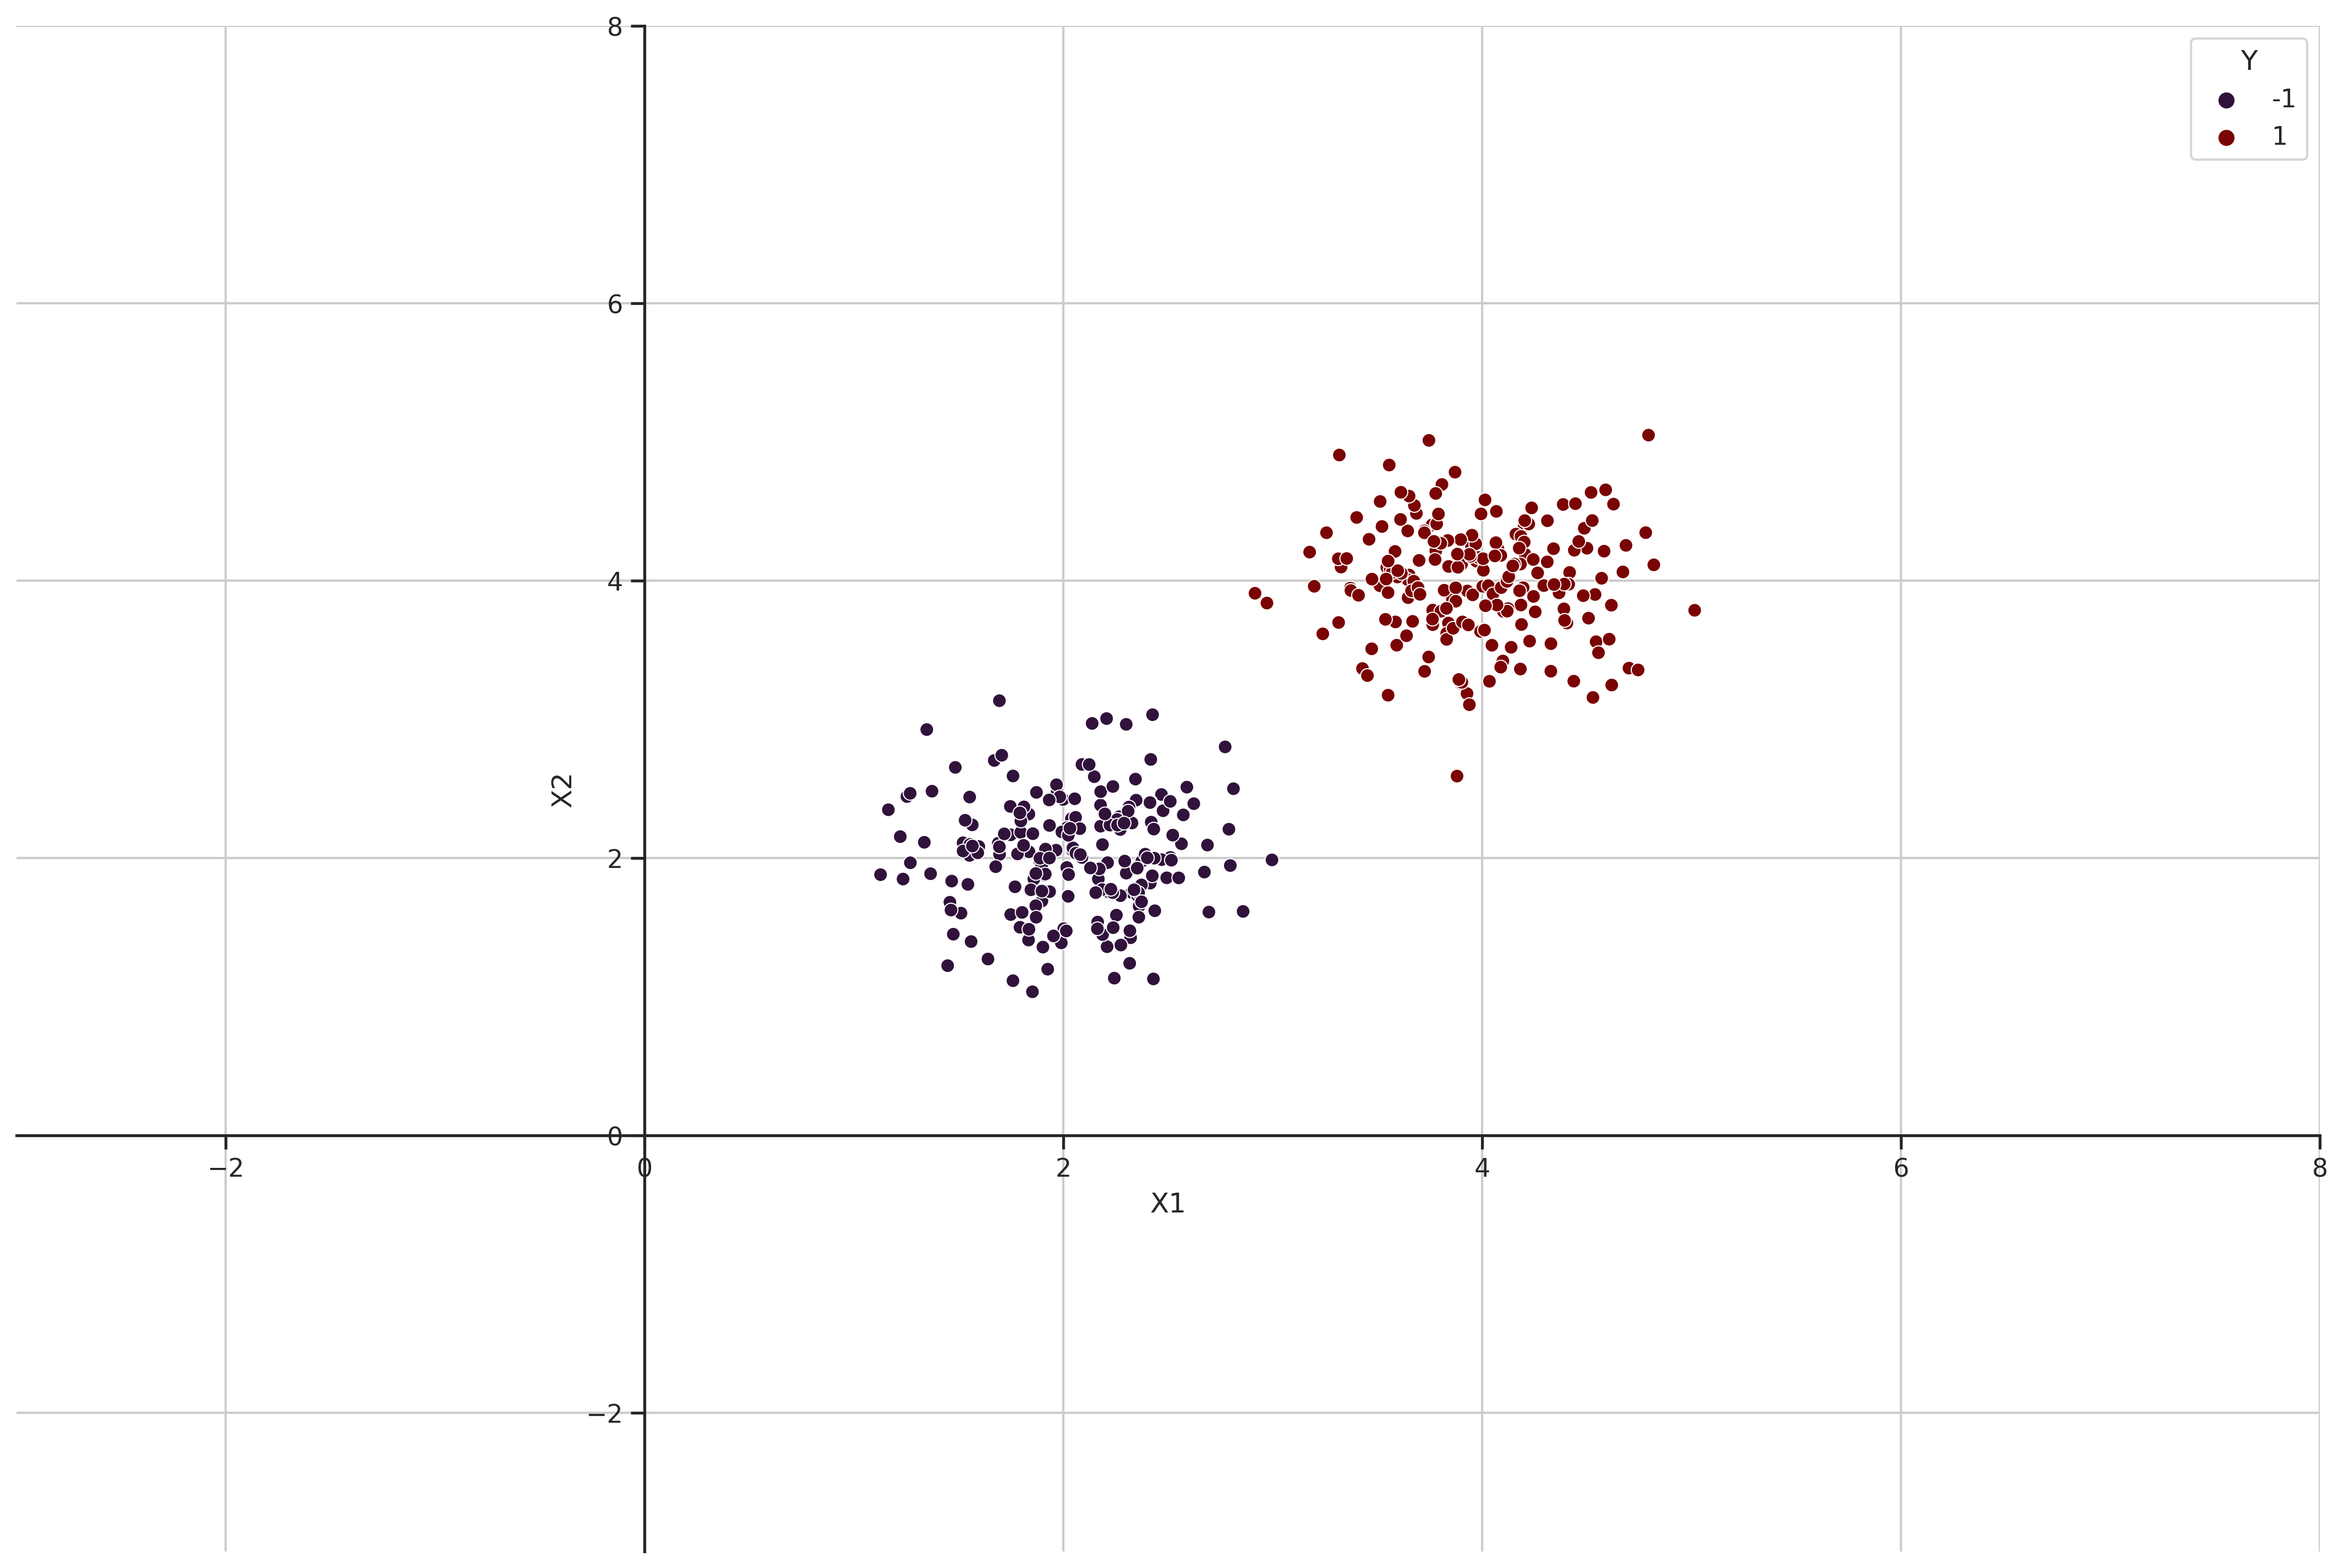

In [217]:
ax = scatterplot(data = dados, x = 'X1', y = 'X2', hue = 'Y', figsize = (18, 12))
ax.grid(True)

***
# <font color=indianred size=10>RESOLUÇÃO DIRETA (MATRICIAL)</font>
***

## 1. CALCULANDO A PSEUDOINVERSA
- A pseudo inversa de uma matriz, denotada como $A^+$, é definida como "A matriz que resolve o problema dos mínimos quadrados $Ax = b$". Nesse caso, se $\bar x$ é a solução, então $A^+$ é a matriz tal que $x = A^+b$. Adaptando ao nosso modelo, queremos descobrir a matriz $X$ tal que $W=X^+Y$

In [218]:
Xp = np.linalg.pinv(dados[['X0', 'X1', 'X2']])
pd.DataFrame(Xp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.011298,0.008566,0.009210,0.009847,0.008087,0.009557,0.009157,0.013845,0.008689,0.009108,0.008384,0.013506,0.009883,0.004897,0.009277,0.007319,0.012438,0.007181,0.008910,0.012329,0.007473,0.011379,0.007709,0.011528,0.007140,0.008812,0.009518,0.006824,0.008235,0.007438,0.010455,0.010981,0.010469,0.007939,0.008443,0.009578,0.011109,0.011130,0.008485,0.009549,0.011465,0.007977,0.006665,0.007991,0.005815,0.010660,0.010216,0.006686,0.011618,0.009224,0.008215,0.009638,0.004140,0.007730,0.009730,0.012412,0.007168,0.011308,0.007849,0.010091,0.008115,0.007421,0.012399,0.009660,0.010805,0.005889,0.007546,0.011767,0.009489,0.012442,0.008959,0.006496,0.012236,0.010302,0.010209,0.014011,0.009543,0.009416,0.009117,0.008873,0.013645,0.010525,0.010672,0.008625,0.009158,0.006880,0.013138,0.010434,0.011034,0.008617,0.007955,0.007339,0.009360,0.006502,0.011541,0.006336,0.01047,0.010977,0.010048,0.011831,0.012693,0.007674,0.011956,0.009470,0.010662,0.006469,0.008153,0.009815,0.010472,0.007454,0.010106,0.009142,0.010754,0.011274,0.013206,0.009581,0.011512,0.008756,0.010627,0.005934,0.011531,0.008226,0.004909,0.009486,0.007727,0.007311,0.010163,0.013657,0.010440,0.005938,0.008081,0.009302,0.011466,0.005661,0.009992,0.010076,0.006910,0.009576,0.007750,0.013221,0.011801,0.008056,0.011740,0.008423,0.013649,0.012968,0.006678,0.008134,0.013687,0.009003,0.010391,0.011077,0.008723,0.005689,0.008072,0.010634,0.010812,0.009954,0.011777,0.008626,0.009429,0.012701,0.010014,0.009667,0.009282,0.008362,0.014658,0.009795,0.008921,0.008910,0.010193,0.011603,0.010934,0.011500,0.009629,0.007308,0.011481,0.008888,0.010908,0.012190,0.010888,0.010169,0.012301,0.013357,0.010580,0.010782,0.011079,0.010965,0.007894,0.010750,0.009679,0.011533,0.009850,0.012765,0.011837,0.006039,0.007421,0.009115,0.009168,0.008190,-0.006096,-0.009200,-0.002905,-0.007419,-0.007654,-0.003429,-0.004265,0.000124,-0.004663,-0.005317,-0.005107,-0.006644,-0.004467,-0.004547,-0.004468,-0.003950,-0.005854,-0.006871,-0.004802,-0.003131,-0.008478,-0.005050,-0.005048,-0.006889,-0.003633,-0.001609,-0.001620,-0.007351,-0.004704,-0.007939,-0.008976,-0.006763,-0.004287,-0.000936,-0.002594,-0.005482,-0.003767,-0.004423,-0.005231,-0.002088,-0.004683,-0.004810,-0.004739,-0.006516,-0.006257,-0.003401,-0.004190,-0.003144,-0.006542,-0.005301,-0.005587,-0.006569,-0.005768,-0.005007,-0.002110,-0.006106,-0.006136,-0.004425,-0.003166,-0.005838,-0.002608,-0.003274,-0.006794,-0.002903,-0.006483,-0.000401,-0.004723,-0.000348,-0.004719,-0.002029,-0.003164

## 2. ENCONTRANDO A MATRIZ $W$

In [219]:
W = Xp.dot(dados['Y'])
pd.DataFrame(W)

,0
0,-2.859657
1,0.492289
2,0.458388


## 3. VISUALIZANDO RESULTADOS

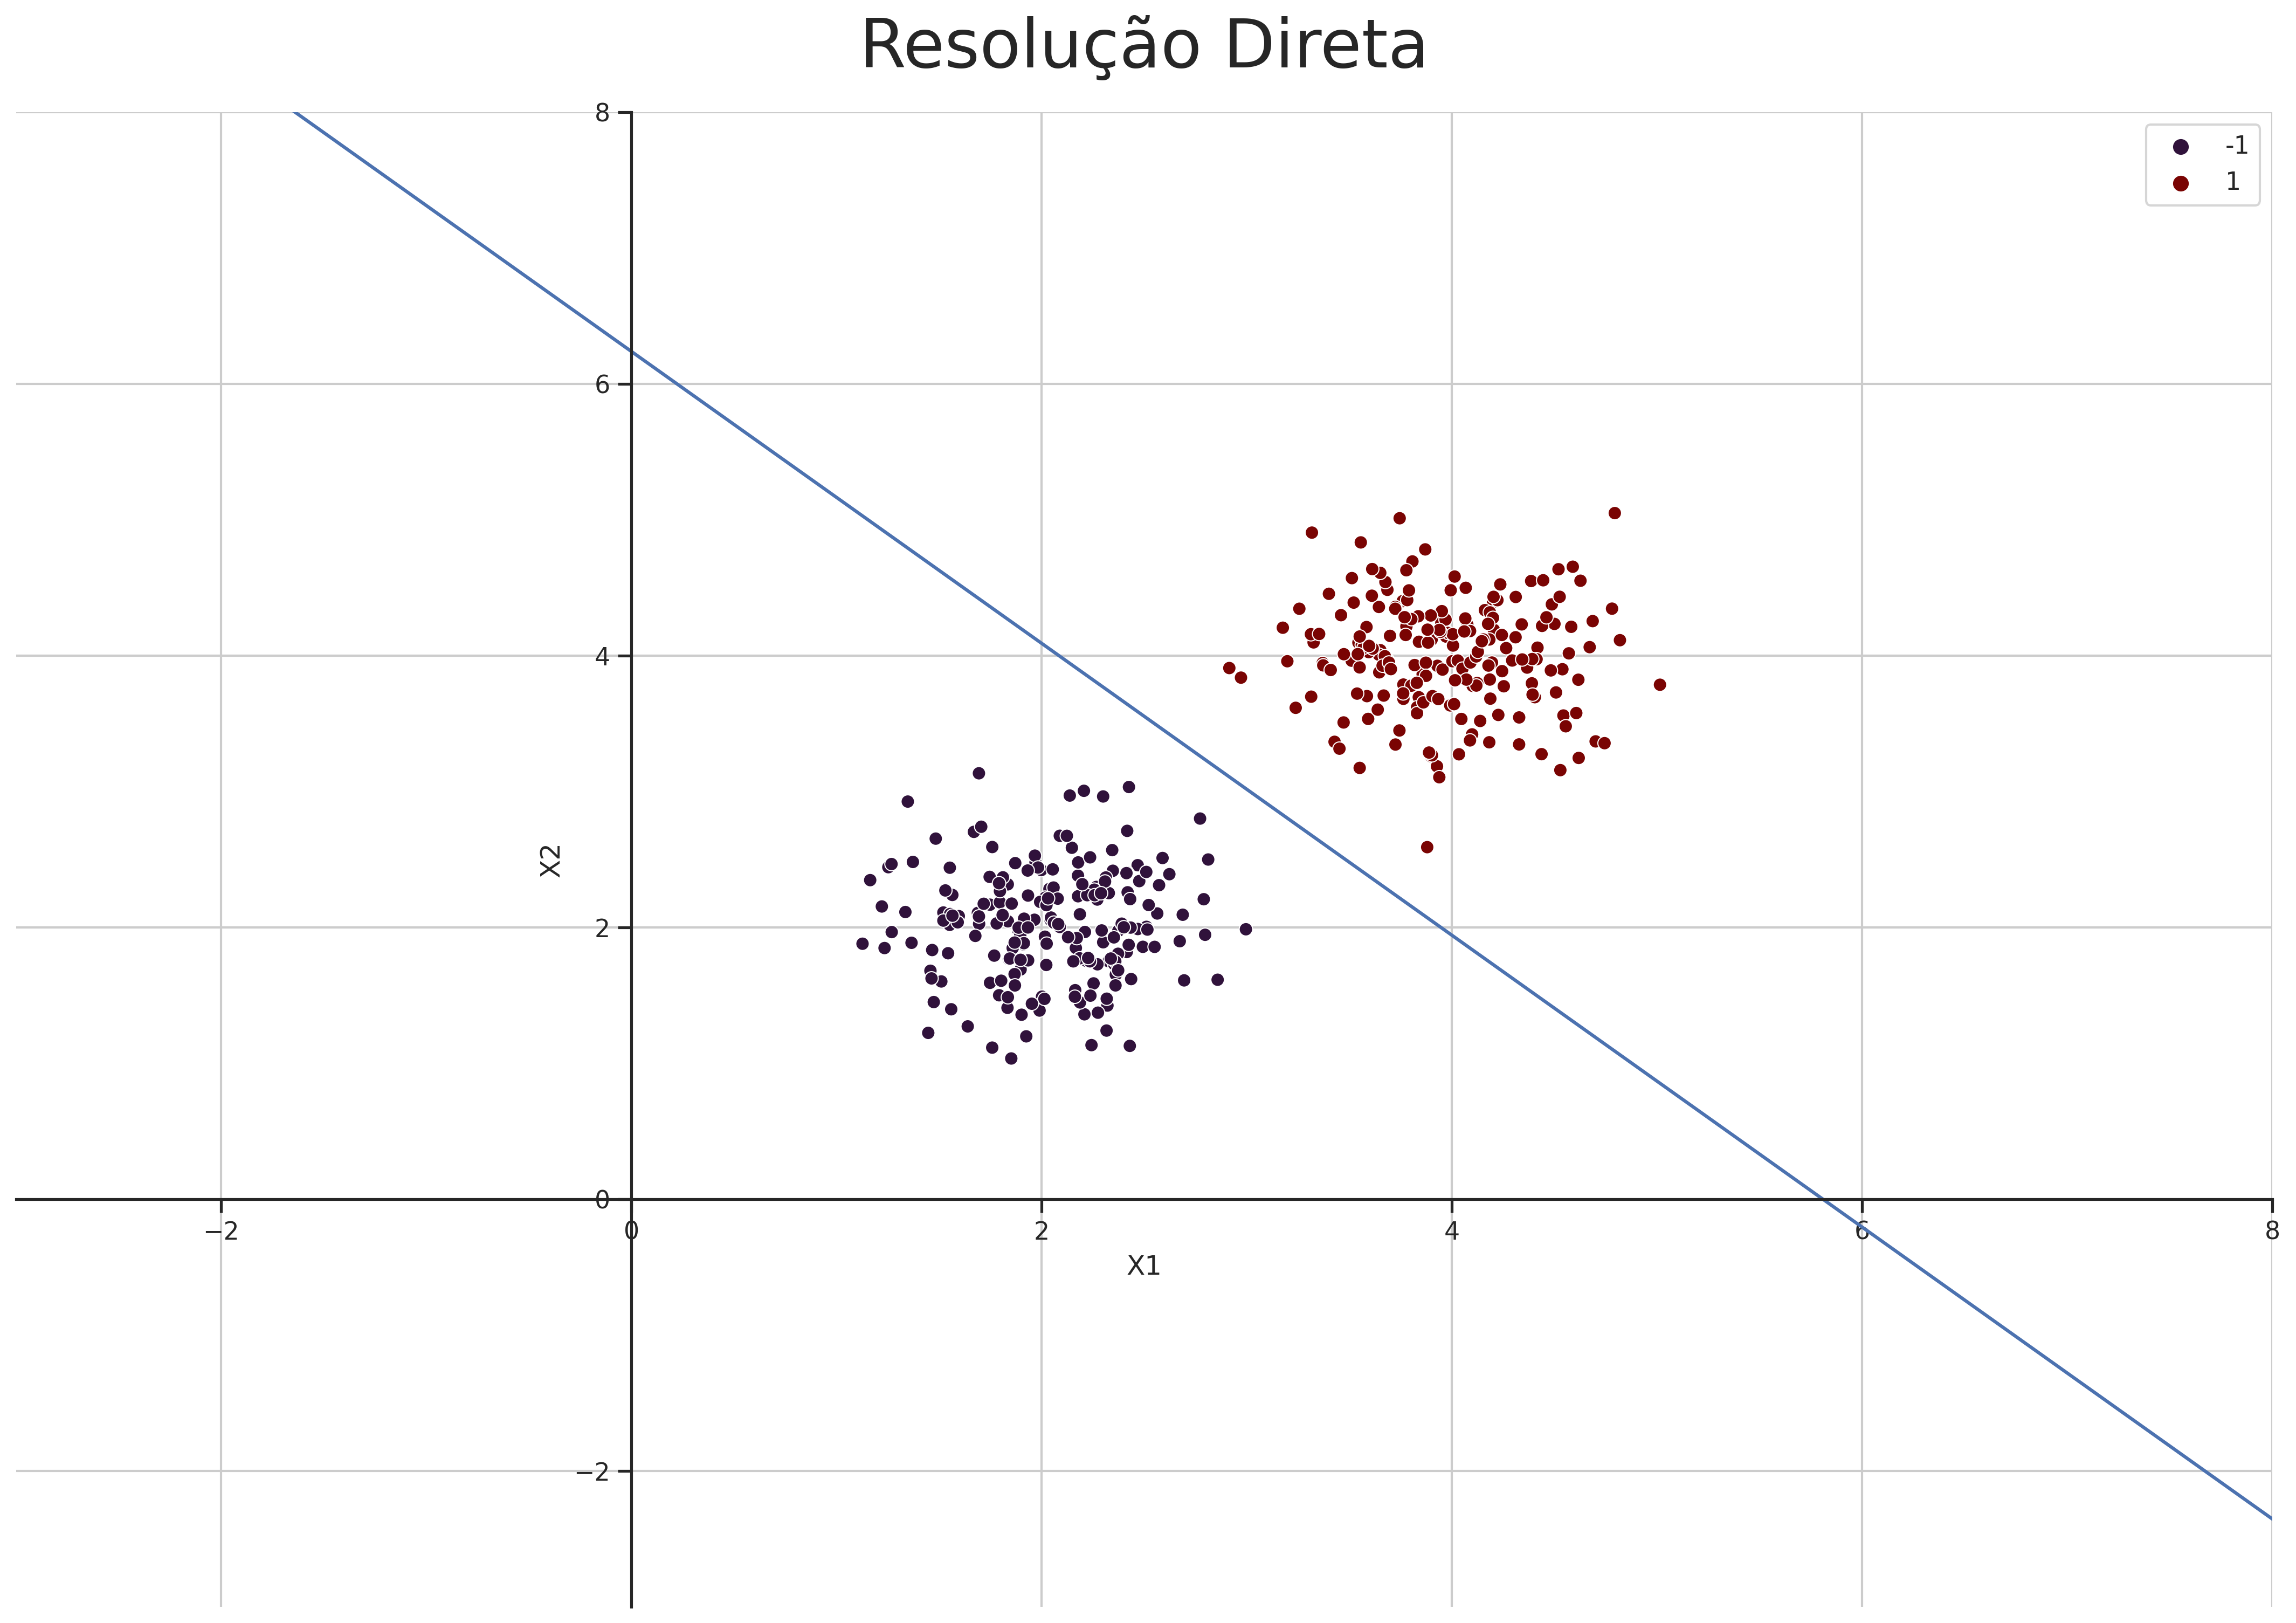

In [220]:
resultMatrix = pd.DataFrame()
resultMatrix['X'] = [x for x in range(-10, 30, 1)]
resultMatrix['Y'] = resultMatrix['X'].apply(lambda x: (-W[1]/W[2])*x - W[0]/W[2])

ax = scatterplot(data = dados, x = 'X1', y = 'X2', hue = 'Y', figsize = (18, 12))
ax = sns.lineplot(data = resultMatrix, x = 'X', y = 'Y')
ax.set_title('Resolução Direta', fontsize = 30, pad = 20)
ax.grid()

***
# <font color=orange size=10>RESOLUÇÃO ITERADA (REGRA DELTA)</font>
***

In [221]:
class Neuronio:
    def __init__(self, kind, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.kind = kind
        self.data = []
        self.df = None

    def func(self, u):
        if self.kind == 'Adaline':
            return u
        elif self.kind == 'Perceptron':
            return np.where(u > 0 , 1, 0)
        
    def addRelatorio(self, Xi, W, yhat, fy, y, e, delta, J, epoca):
        self.data.append([i for i in Xi] + [i for i in W] + [yhat, fy, y, e] + [i for i in delta] + [J, epoca])
    
    def endRelatorio(self, l):
        cols = [f'X{i}' for i in range(l)] + [f'W{i}' for i in range(l)] + ['ŷ', 'f(ŷ)', 'y', 'e'] + [f'Δ{i}' for i in range(l)] + ['J', 'epoca']
        self.df = pd.DataFrame(self.data, columns = cols).round(2)
        self.df['e²'] = (self.df['e']**2).round(2)
    
    def getError(self):
        return [df.iloc[-1]['J'] for _, df in self.df.groupby('epoca')]
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        y = self.func(y)
        for epoca in range(self.n_iters):
            perm = np.random.permutation(n_samples)
            X, y = X[perm], y[perm]
            J = 0
            for index, Xi in enumerate(X):
                yhat = np.dot(Xi, self.weights)
                e = y[index] - self.func(yhat)
                delta = self.lr * e * Xi
                J += e**2
                self.addRelatorio(Xi, self.weights, yhat, self.func(yhat), y[index], e, delta, J, epoca)
                self.weights += delta
            if J < 0.01: break
        self.endRelatorio(n_features)


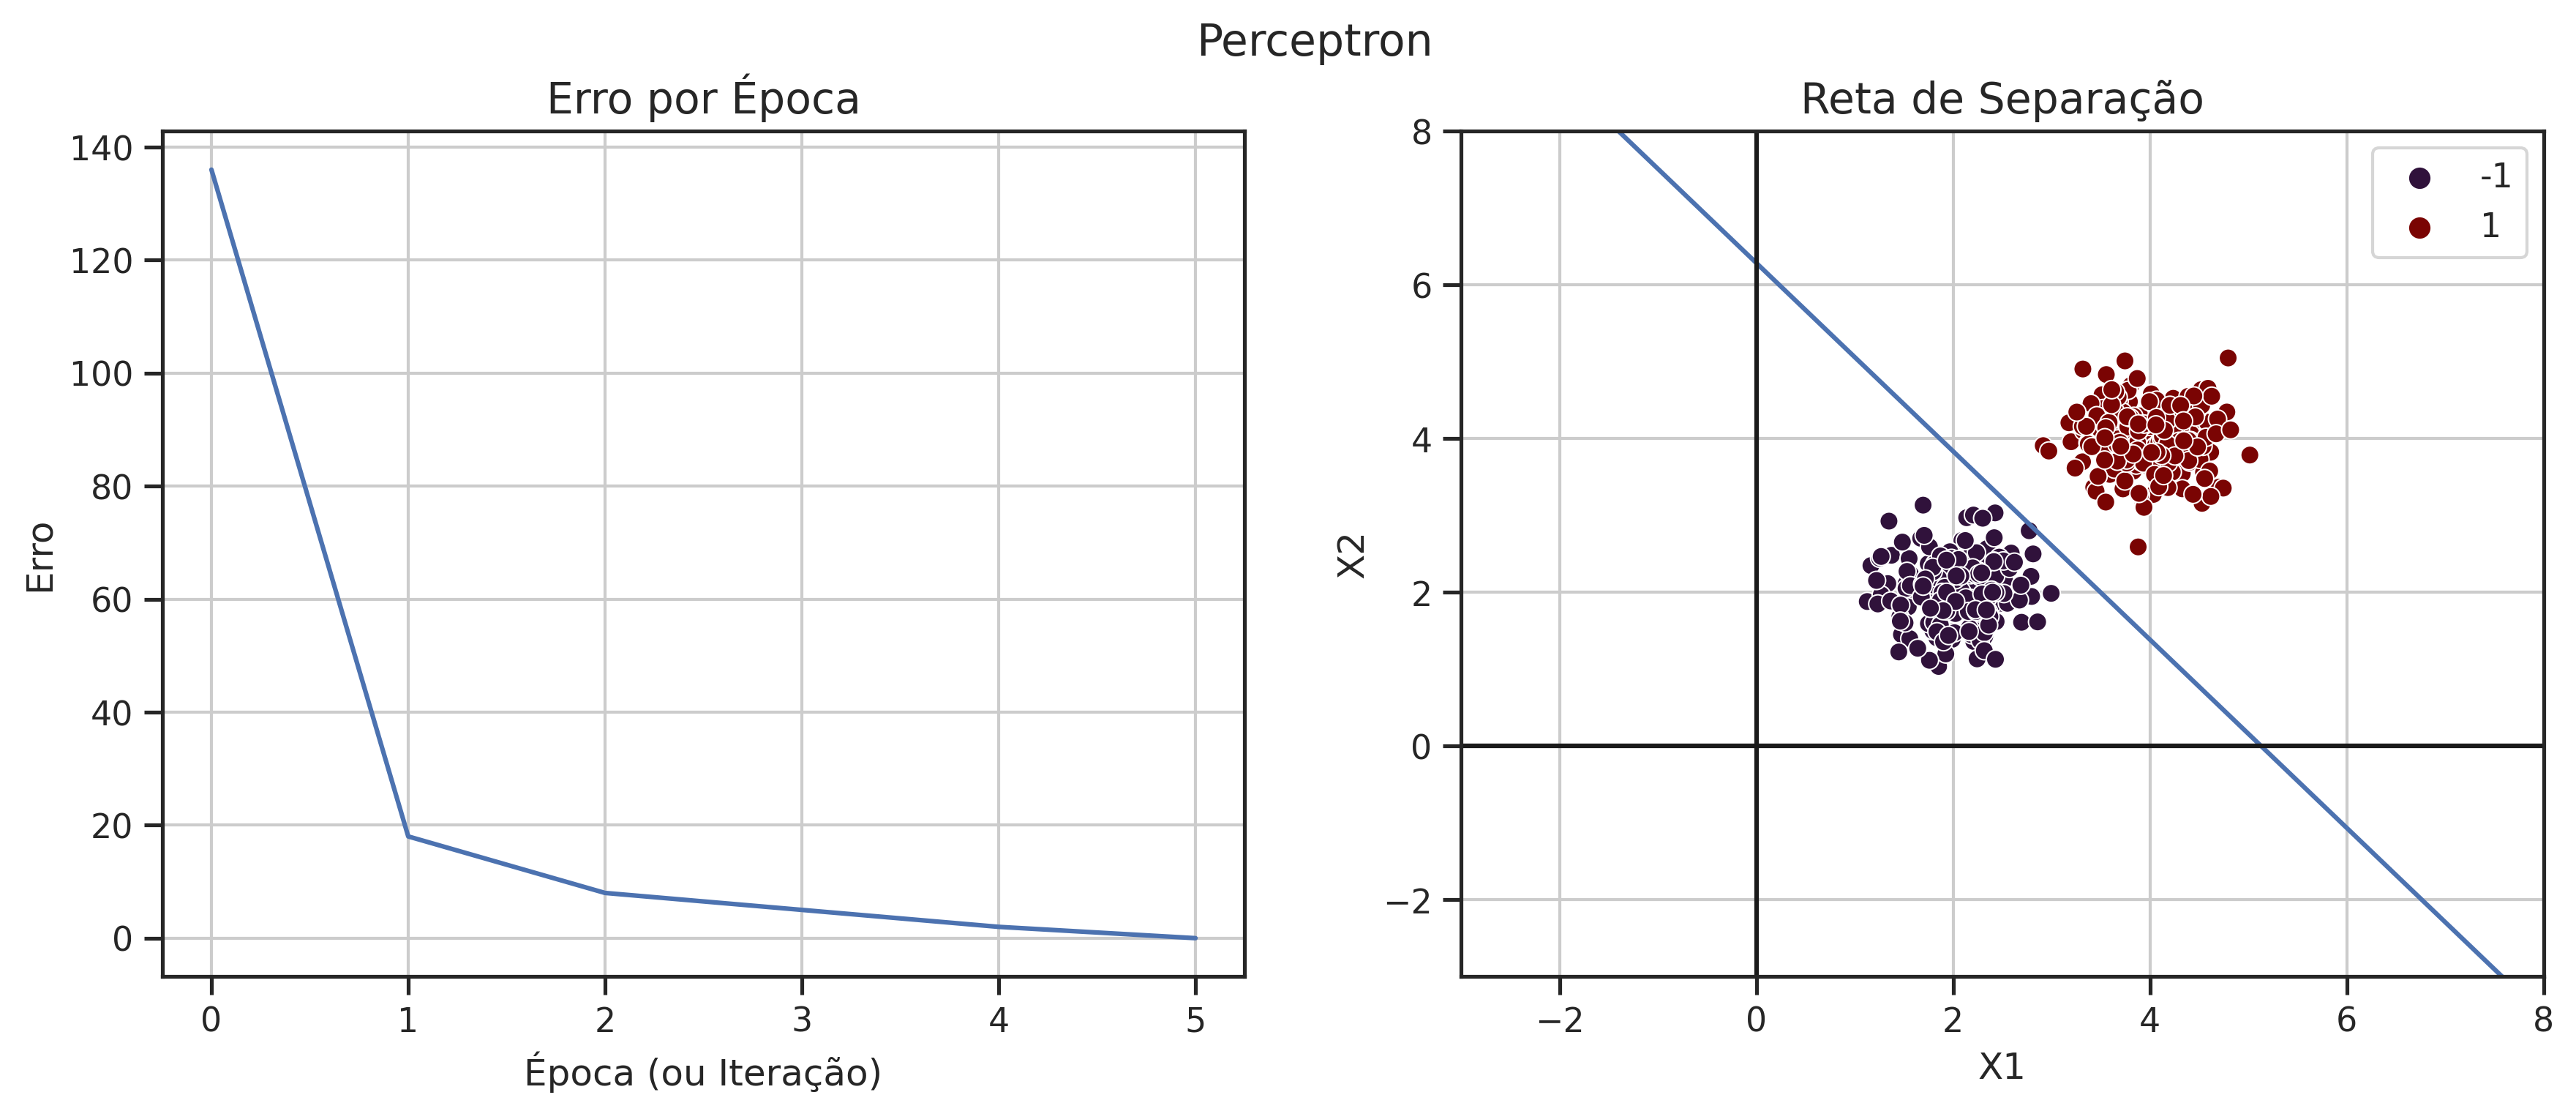

,X0,X1,X2,W0,W1,W2,ŷ,f(ŷ),y,e,Δ0,Δ1,Δ2,J,epoca,e²
0,1.0,1.34,2.11,0.36,0.41,0.90,2.79,1,0,-1,-0.01,-0.01,-0.02,1,0,1
1,1.0,1.97,2.48,0.35,0.39,0.88,3.29,1,0,-1,-0.01,-0.02,-0.02,2,0,1
2,1.0,4.46,4.28,0.34,0.37,0.85,5.64,1,1,0,0.00,0.00,0.00,2,0,0
3,1.0,3.95,4.33,0.34,0.37,0.85,5.49,1,1,0,0.00,0.00,0.00,2,0,0
4,1.0,1.52,2.11,0.34,0.37,0.85,2.70,1,0,-1,-0.01,-0.02,-0.02,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1.0,2.04,2.28,-0.33,0.07,0.05,-0.08,0,0,0,0.00,0.00,0.00,0,5,0
2396,1.0,1.72,2.17,-0.33,0.07,0.05,-0.11,0,0,0,0.00,0.00,0.00,0,5,0
2397,1.0,4.13,4.03,-0.33,0.07,0.05,0.15,1,1,0,0.00,0.00,0.00,0,5,0
2398,1.0,4.03,3.27,-0.33,0.07,0.05,0.10,1,1,0,0.00,0.00,0.00,0,5,0


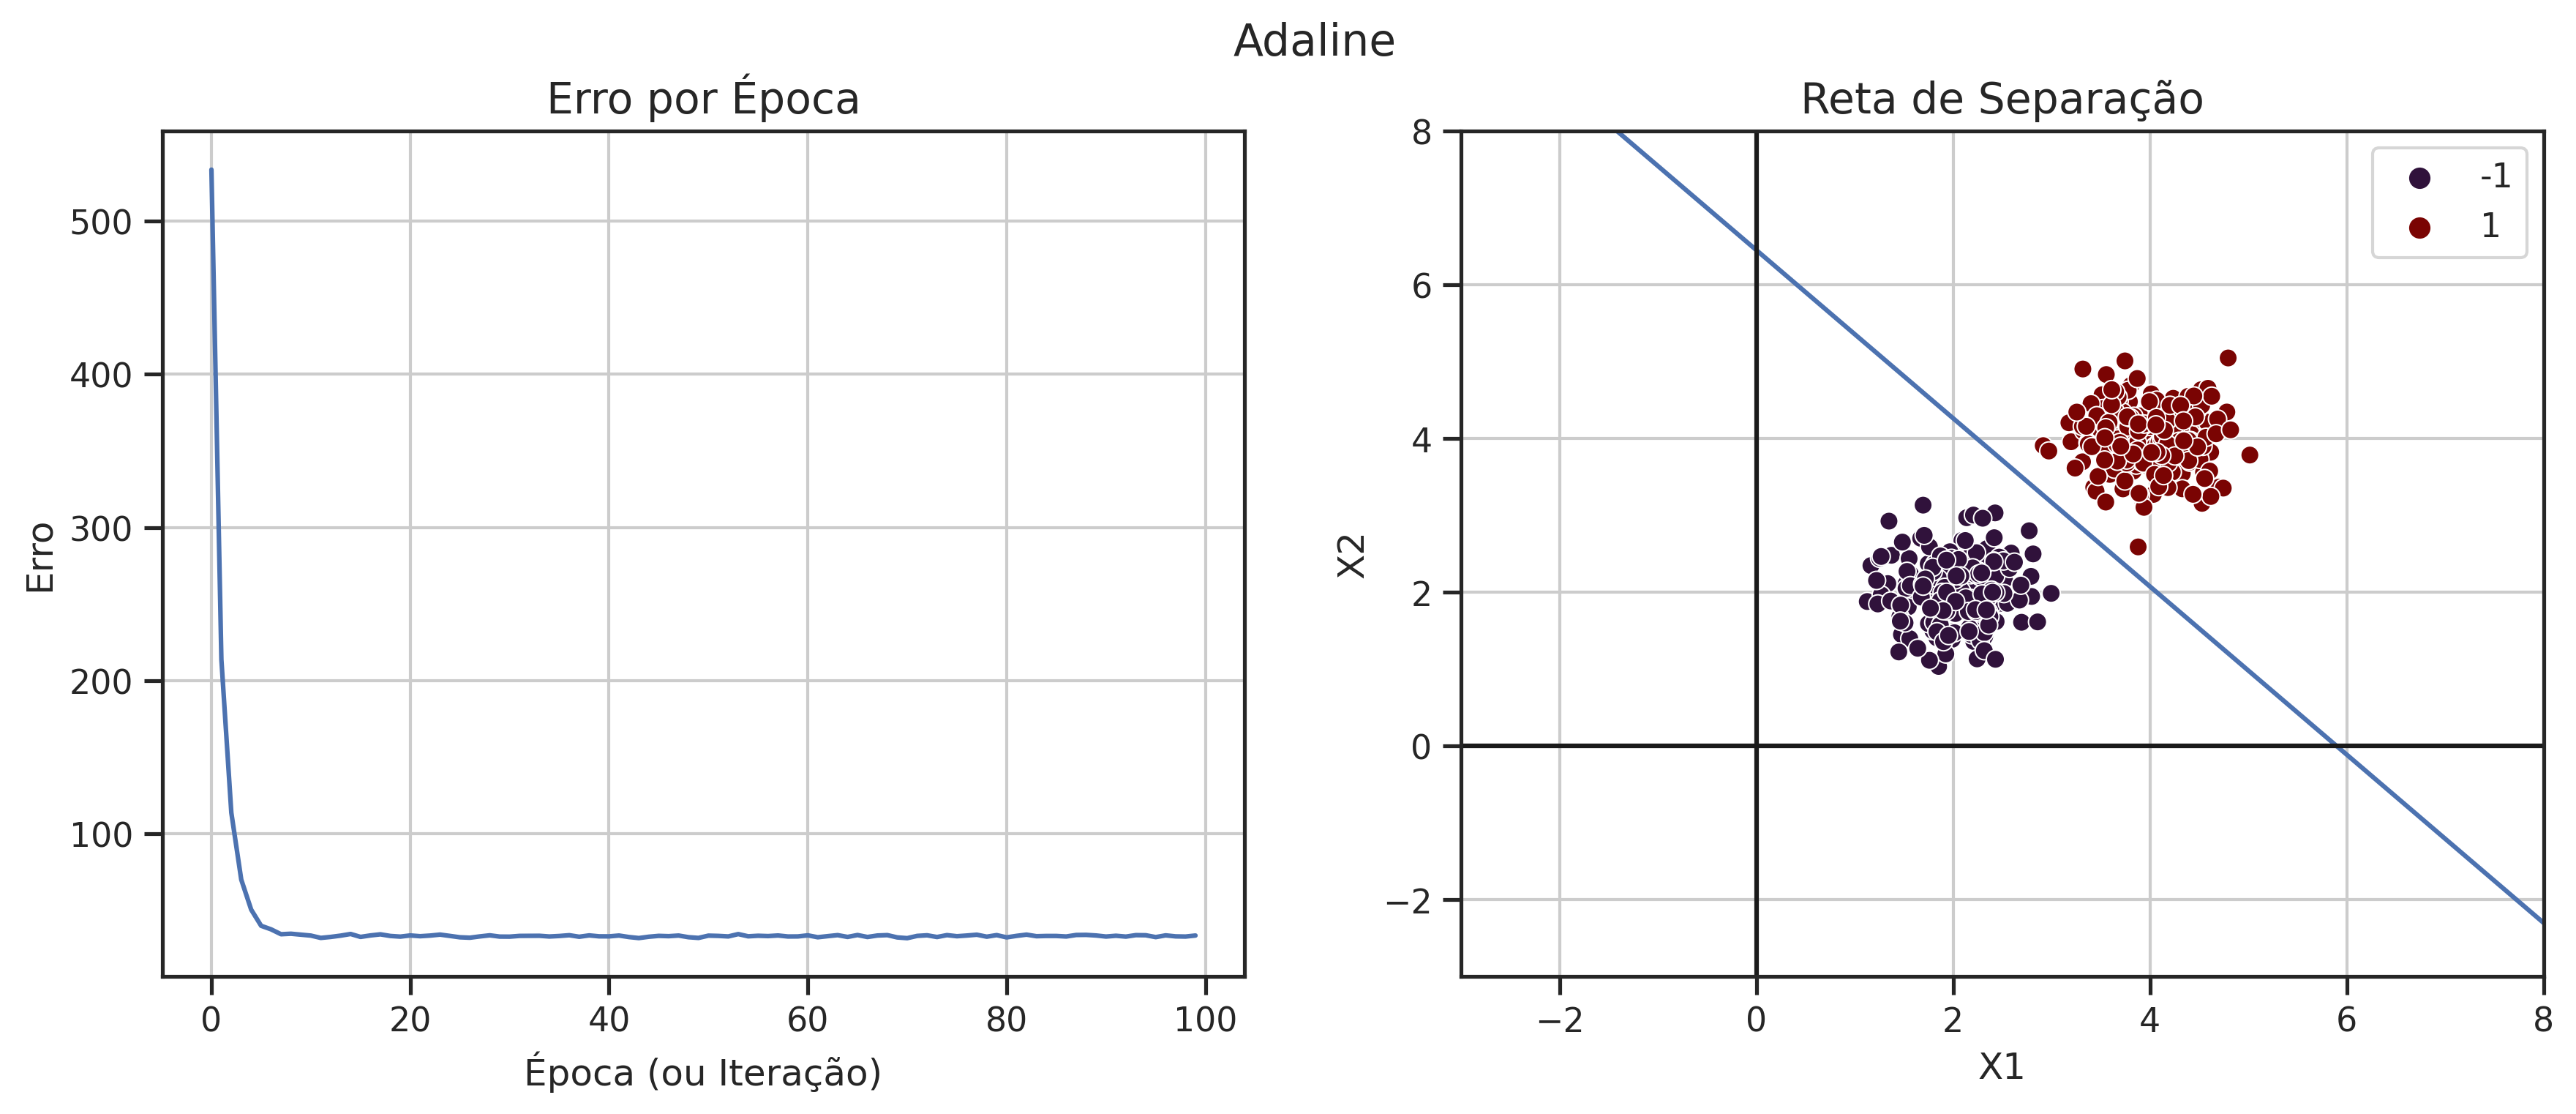

,X0,X1,X2,W0,W1,W2,ŷ,f(ŷ),y,e,Δ0,Δ1,Δ2,J,epoca,e²
0,1.0,1.23,1.85,0.99,0.94,0.93,3.86,3.86,-1,-4.86,-0.05,-0.06,-0.09,23.65,0,23.62
1,1.0,2.32,1.43,0.94,0.88,0.84,4.18,4.18,-1,-5.18,-0.05,-0.12,-0.07,50.47,0,26.83
2,1.0,1.97,2.53,0.88,0.76,0.76,4.32,4.32,-1,-5.32,-0.05,-0.10,-0.13,78.74,0,28.30
3,1.0,3.91,3.70,0.83,0.66,0.63,5.73,5.73,1,-4.73,-0.05,-0.18,-0.18,101.14,0,22.37
4,1.0,5.01,3.79,0.78,0.47,0.45,4.88,4.88,1,-3.88,-0.04,-0.19,-0.15,116.17,0,15.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.0,1.90,1.36,-2.87,0.49,0.45,-1.32,-1.32,-1,0.32,0.00,0.01,0.00,33.57,99,0.10
39996,1.0,1.81,2.37,-2.86,0.50,0.46,-0.89,-0.89,-1,-0.11,-0.00,-0.00,-0.00,33.58,99,0.01
39997,1.0,2.15,2.59,-2.86,0.49,0.45,-0.63,-0.63,-1,-0.37,-0.00,-0.01,-0.01,33.71,99,0.14
39998,1.0,4.26,4.06,-2.87,0.49,0.44,1.00,1.00,1,-0.00,-0.00,-0.00,-0.00,33.71,99,0.00


In [222]:
X = dados.drop('Y', axis = 1).values
Y = dados['Y'].values

for kind in ['Perceptron', 'Adaline']:
    p = Neuronio(learning_rate=0.01, n_iters=100, kind = kind)
    p.fit(X, Y)
    W = p.weights

    resultMatrix = pd.DataFrame()
    resultMatrix['X'] = [x for x in range(-10, 30, 1)]
    resultMatrix['Y'] = resultMatrix['X'].apply(lambda x: (-W[1]*x-W[0])/W[2])

    fig, axs = plt.subplots(1, 2, figsize = (14, 5))
    fig.suptitle(f'{p.kind}')
    sns.lineplot(p.getError(), ax = axs[0])
    axs[0].grid(True)
    axs[0].set_title('Erro por Época', fontsize = 14)
    axs[0].set_xlabel('Época (ou Iteração)', fontsize = 12)
    axs[0].set_ylabel('Erro', fontsize = 12)

    sns.scatterplot(data = dados, x = 'X1', y = 'X2', hue = 'Y', palette='turbo', ax = axs[1])
    sns.lineplot(data = resultMatrix, x = 'X', y = 'Y', ax = axs[1])
    axs[1].axhline(0, 0, c = 'k')
    axs[1].axvline(0, 0, c = 'k')
    axs[1].set_xlim(-3, 8)
    axs[1].set_ylim(-3, 8)
    axs[1].set_title('Reta de Separação', fontsize = 14)
    axs[1].set_xlabel('X1', fontsize = 12)
    axs[1].set_ylabel('X2', fontsize = 12)
    axs[1].grid(True)
    plt.show()
    display(p.df)